In [2]:
#filepaths

#Three LLMs 

#1 Flan t5
#2 GPT2
#3 Llama 3

#"C:\Users\pc\01_flan-t5-large_FEVER_results.csv"
#"C:\Users\pc\01_gpt2_FEVER_results.csv"
#"C:\Users\pc\01_Llama-3.1-8B_FEVER_results.csv"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df_flan = pd.read_csv("01_flan-t5-large_FEVER_results.csv")
df_gpt = pd.read_csv("01_gpt2_FEVER_results.csv")
df_llama = pd.read_csv("01_Llama-3.1-8B_FEVER_results.csv")

In [45]:
df_flan.shape

(2384, 5)

In [29]:
#FEVER

df_flan['Predicted Correct'] = (df_flan['Fact-Check Verdict'] == df_flan['FEVER Label']).astype(int)
df_gpt['Predicted Correct'] = (df_gpt['Fact-Check Verdict'] == df_gpt['FEVER Label']).astype(int)
df_llama['Predicted Correct'] = (df_llama['Fact-Check Verdict'] == df_llama['FEVER Label']).astype(int)
print(df_flan['Predicted Correct'].value_counts())
print(df_gpt['Predicted Correct'].value_counts())
print(df_llama['Predicted Correct'].value_counts())

Predicted Correct
0    1386
1     998
Name: count, dtype: int64
Predicted Correct
0    1680
1     704
Name: count, dtype: int64
Predicted Correct
0    1800
1     584
Name: count, dtype: int64


In [41]:
FEVER_flan = round((((df_flan['Predicted Correct'] == 1).sum())/(df_flan['Predicted Correct'].count()))*100, 1)
FEVER_gpt = round((((df_gpt['Predicted Correct'] == 1).sum())/(df_gpt['Predicted Correct'].count()))*100, 1)
FEVER_llama =round((((df_llama['Predicted Correct'] == 1).sum())/(df_llama['Predicted Correct'].count()))*100, 1)
print('Flan ', FEVER_flan)
print('GPT ', FEVER_gpt)
print('LLaMA', FEVER_llama)

Flan  41.9
GPT  29.5
LLaMA 24.5


In [42]:
data = {'Model': ["Flan", "GPT-2", "LLaMA"], 
        'Number of Claims':[df_flan.shape[0], df_gpt.shape[0], df_llama.shape[0]], 
        'Number of Predicted Correct': [(df_flan['Predicted Correct'] == 1).sum(), (df_gpt['Predicted Correct'] == 1).sum(), (df_llama['Predicted Correct'] == 1).sum()], 
        '% of Predicted Correct' : [FEVER_flan, FEVER_gpt, FEVER_llama]}
df_FEVER_predicted_correct = pd.DataFrame(data)
df_FEVER_predicted_correct

,Model,Number of Claims,Number of Predicted Correct,% of Predicted Correct
0,Flan,2384,998,41.9
1,GPT-2,2384,704,29.5
2,LLaMA,2384,584,24.5


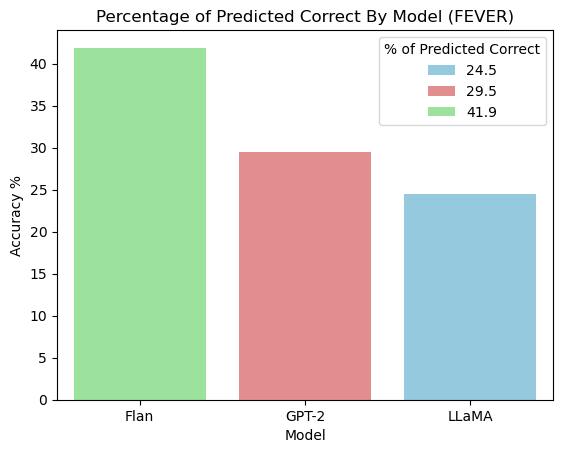

In [44]:
colors = ['skyblue', 'lightcoral', 'lightgreen']

# Create the bar chart
sns.barplot(x='Model', y='% of Predicted Correct', hue = '% of Predicted Correct', data=df_FEVER_predicted_correct, palette = colors)

# Add title and labels
plt.title('Percentage of Predicted Correct By Model (FEVER)')
plt.xlabel('Model')
plt.ylabel('Accuracy %')

# Save the plot as a PNG image
plt.savefig('FEVER BASELINE.png')

# Show the plot

plt.show()

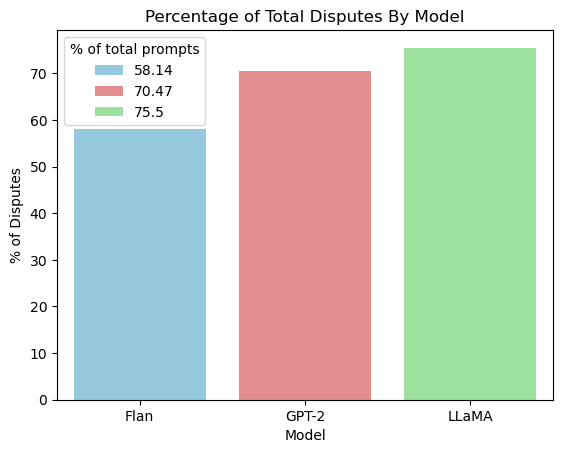

In [19]:
colors = ['skyblue', 'lightcoral', 'lightgreen']

# Create the bar chart
sns.barplot(x='Model', y='% of total prompts', hue = '% of total prompts', data=df_dispute, palette = colors)

# Add title and labels
plt.title('Percentage of Total Disputes By Model')
plt.xlabel('Model')
plt.ylabel('% of Disputes')

# Save the plot as a PNG image
#plt.savefig('percentage_disputes_by_model2.png')

# Show the plot

plt.show()

# TruthfulQA

In [47]:
#File paths for truthful
#"C:\Users\pc\02flan-t5-large_TruthfulQA_results.csv"
#"C:\Users\pc\02gpt2_TruthfulQA_results.csv"
#"C:\Users\pc\02Llama-3.1-8B_TruthfulQA_results.csv"


t_flan = pd.read_csv("02flan-t5-large_TruthfulQA_results.csv")
t_gpt = pd.read_csv("02gpt2_TruthfulQA_results.csv")
t_llama = pd.read_csv("02Llama-3.1-8B_TruthfulQA_results.csv")

print(t_flan.shape)
print(t_gpt.shape)
print(t_llama.shape)

(817, 4)
(817, 4)
(817, 4)


In [56]:
a = t_flan.shape[0]
truthfulqa_flan = round(((((t_flan['Predicted Correct'] == 1).sum())/a)*100),1)
truthfulqa_gpt = round(((((t_gpt['Predicted Correct'] == 1).sum())/a)*100),1)
truthfulqa_llama = round(((((t_llama['Predicted Correct'] == 1).sum())/a)*100),1)
# truthfulqa_llama
print('truthfulQA flan', truthfulqa_flan, '%')
print('truthfulQA gpt', truthfulqa_gpt, '%')
print('truthfulQA LLaMA', truthfulqa_llama, '%')

truthfulQA flan 56.3 %
truthfulQA gpt 90.8 %
truthfulQA LLaMA 90.6 %


In [66]:
data_truthfulQA = {'Model': ["Flan", "GPT-2", "LLaMA"], 
        'Number of Questions':[a, a, a],
        'Number of Correct Responses': [(t_flan['Predicted Correct'] == 1).sum(), (t_gpt['Predicted Correct'] == 1).sum(), (t_llama['Predicted Correct'] == 1).sum()],
        'Accacy Rate %' : [truthfulqa_flan, truthfulqa_gpt, truthfulqa_llama]}
df_truthfulQA = pd.DataFrame(data_truthfulQA)
df_truthfulQA

,Model,Number of Questions,Number of Correct Responses,Accuracy Rate %
0,Flan,817,460,56.3
1,GPT-2,817,742,90.8
2,LLaMA,817,740,90.6


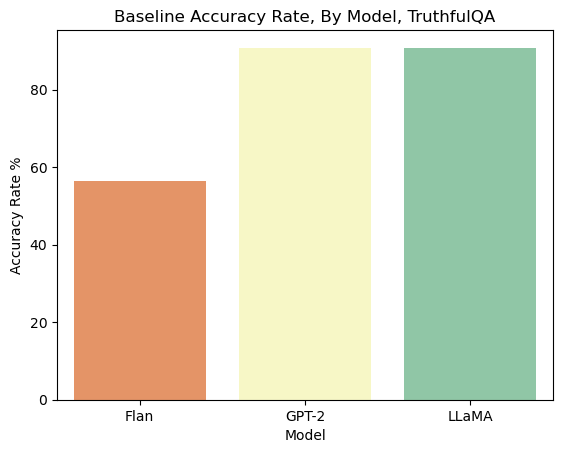

In [76]:
#Barchart for truthful
#'darkseagreen'
#'royalblue'
#'peachpuff'
colors_t = ['muted', 'royalblue', 'peachpuff']

st1 = "Accuracy Rate %"
# Create the bar chart
sns.barplot(x='Model', y=st1, hue = 'Model', data=df_truthfulQA, palette = 'Spectral')

# Add title and labels
plt.title('Baseline Accuracy Rate, By Model, TruthfulQA')
plt.xlabel('Model')
plt.ylabel('Accuracy Rate %')

# Save the plot as a PNG image
#plt.savefig('Baseline Accuracy TruthfulQA.png')

# Show the plot

plt.show()

# Fine-Tuned LLaMA 3.3

In [20]:
#"C:\Users\pc\llama-3-8b-fine-tuned_FEVER_results-2.csv"

t_llama_ft = pd.read_csv("llama-3-8b-fine-tuned_FEVER_results-2.csv")

In [23]:
print("Llama Pre Fine_Tuned", t_llama.shape)
print("Llama After Fine_Tuned", t_llama_ft.shape)

Llama Pre Fine_Tuned (817, 4)
Llama After Fine_Tuned (817, 4)


In [28]:
t_llama_ft.columns

Index(['Question', 'LLM Answer', 'Actual Answer', 'Predicted Correct'], dtype='object')

In [31]:

count_t_llama_ft = count_truth(t_llama_ft, p, 1)
print(count_t_llama)
print(count_t_llama_ft)

77
0


In [90]:
df_finetuned_llama_FEVER = df_finetuned_llama.loc[(df_finetuned_llama['Dataset'] == 'FEVER')]
df_finetuned_llama_TruthfulQA = df_finetuned_llama.loc[(df_finetuned_llama['Dataset']== 'TruthfulQA')]


In [91]:
df_finetuned_llama_FEVER

,Model,Fine-Tuned,Dataset,Accuracy Rate %
0,LLaMA,Before Fine-Tuning,FEVER,24.5
1,LLaMA,After Fine-Tuning,FEVER,51.9


In [92]:
df_finetuned_llama_TruthfulQA

,Model,Fine-Tuned,Dataset,Accuracy Rate %
2,LLaMA,Before Fine-Tuning,TruthfulQA,90.6
3,LLaMA,After Fine-Tuning,TruthfulQA,100.0


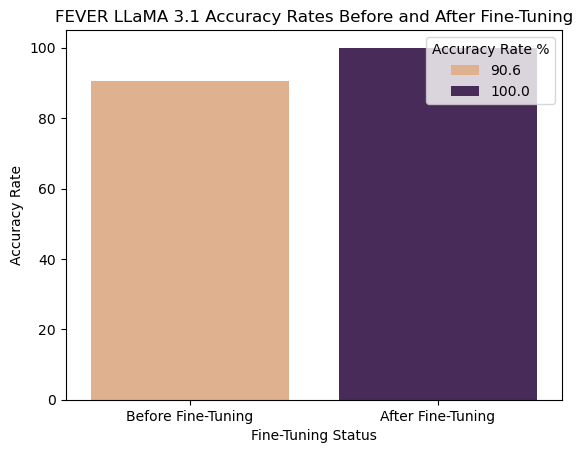

In [96]:
#Barchart for truthful
#'darkseagreen'
#'royalblue'
#'peachpuff'
#colors_t = ['darkseagreen', 'royalblue', 'peachpuff']

st1 = "Accuracy Rate %"
# Create the bar chart
sns.barplot(x='Fine-Tuned', y=st1, hue = st1, data=df_finetuned_llama_TruthfulQA, palette = 'flare')

# Add title and labels
plt.title('FEVER LLaMA 3.1 Accuracy Rates Before and After Fine-Tuning')
plt.xlabel('Fine-Tuning Status')
plt.ylabel('Accuracy Rate')

# Save the plot as a PNG image
plt.savefig('Fine Tuned LLaMA TruthfulQA.png')

# Show the plot

plt.show()